In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
sr=np.loadtxt('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/SeismicResponse.txt')
sr_n=np.loadtxt('C:/Users/yashg/OneDrive/Desktop/CMU/Fall 2020/Data Management/SeismicResponse_noNoise.txt')

In [77]:
sr.shape

(5000, 8)

In [78]:
a1=sr[:,0]
a2=sr[:,1]
a3=sr[:,2]
a4=sr[:,3]
a5=sr[:,4]
a6=sr[:,5]
a7=sr[:,6]
a8=sr[:,7]

In [79]:
Lx=30
Ly=15

In [80]:
t_in=0
dt=0.01
t_fin=0.01*(len(sr)-1)
t=np.linspace(t_in,t_fin,len(sr))

In [81]:
a_by=(a5+a6)/2
theta_b=(a5-a6)/Lx
a_bx=a7-(theta_b)*(Ly/2)
a_ay=(a1+a2)/2
theta_a=(a1-a2)/Lx
a_ax=a3-(theta_a)*(Ly/2)

## Q1

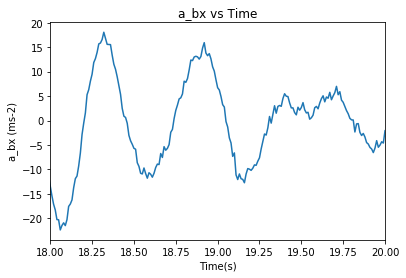

In [82]:
plt.plot(t,a_bx)
plt.xlim(18,20)
plt.xlabel('Time(s)')
plt.ylabel('a_bx (ms-2)')
plt.title('a_bx vs Time')
plt.show()

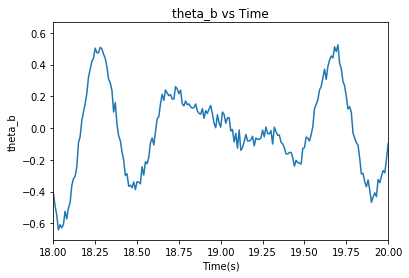

In [83]:
plt.plot(t,theta_b)
plt.xlim(18,20)
plt.xlabel('Time(s)')
plt.ylabel('theta_b')
plt.title('theta_b vs Time')
plt.show()

## Q2

In [84]:
a_bx_max=np.max(np.abs(a_bx))
ind=np.argmax(np.abs(a_bx))
t_bx_max=t[ind]
print(a_bx_max,'\n',t_bx_max)

22.361121636249997 
 18.06


## Q3

In [85]:
a_IDY=a_by-a_ay

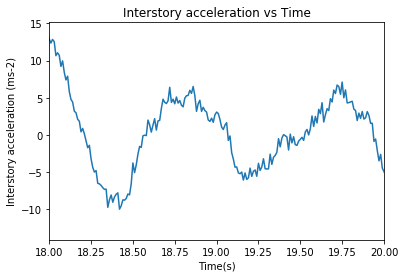

In [87]:
plt.plot(t,a_IDY)
plt.xlim(18,20)
plt.xlabel('Time(s)')
plt.ylabel('Interstory acceleration (ms-2)')
plt.title('Interstory acceleration vs Time')
plt.show()

In [88]:
idy_max=np.max(np.abs(a_IDY))
ind=np.argmax(np.abs(a_IDY))
t_idy_max=t[ind]
print(idy_max,'\n',t_idy_max)

13.8072427565 
 17.990000000000002


## Q4

In [89]:
isv=np.zeros(len(a_IDY))
for i in range(len(a_IDY)):
    a_cut=a_IDY[0:i+1]
    isv[i]=np.sum(a_cut)*dt

In [90]:
isd=np.zeros(len(isv))
for i in range(len(isv)):
    a_cut=isv[0:i+1]
    isd[i]=np.sum(a_cut)*dt

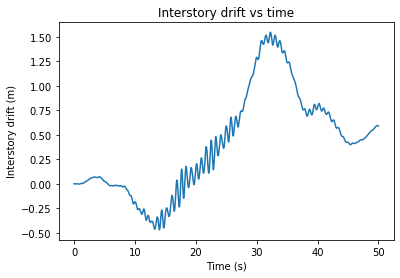

In [91]:
plt.plot(t,isd)
plt.xlabel('Time (s)')
plt.ylabel('Interstory drift (m)')
plt.title('Interstory drift vs time')
plt.show()

In [93]:
mx=np.max(np.abs(isd))
ix=np.argmax(np.abs(isd))
t[ix],mx

(32.26, 1.5468464282532006)

## Q5

In [48]:
t_cut_ind=np.where(t<=5)
a1_cut=a1[t_cut_ind]

In [94]:
sd=np.sqrt(1/(len(a1_cut)-1)*np.sum(a1_cut**2))
sd

0.6115830397623936

## Q6

In [95]:
t_cut_ind=np.where(t<=5)
a1_cut=a1[t_cut_ind]
a2_cut=a2[t_cut_ind]
a5_cut=a5[t_cut_ind]
a6_cut=a6[t_cut_ind]

In [96]:
qs=[a1_cut,a2_cut,a5_cut,a6_cut]
sd_squared=0
for x in qs:
    sd=np.sqrt(1/(len(x)-1)*np.sum(x**2))
    sd_squared+=sd**2
    print(sd,'.....',sd_squared)

0.6115830397623936 ..... 0.3740338145250095
0.5878789638890951 ..... 0.7196354907083256
0.6267645557033682 ..... 1.112469298994366
0.6406377736846722 ..... 1.5228860560660193


In [97]:
sd_idy=np.sqrt(sd_squared)
sd_idy

1.234052695822192

## Q7

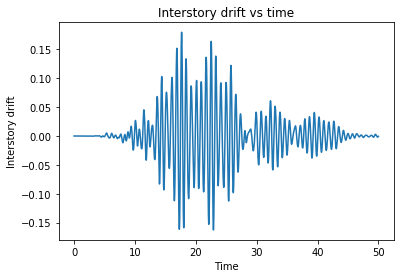

In [101]:
a1=sr_n[:,0]
a2=sr_n[:,1]
a3=sr_n[:,2]
a4=sr_n[:,3]
a5=sr_n[:,4]
a6=sr_n[:,5]
a7=sr_n[:,6]
a8=sr_n[:,7]
a_by=(a5+a6)/2
theta_b=(a5-a6)/Lx
a_bx=a7-(theta_b)*(Ly/2)
a_ay=(a1+a2)/2
theta_a=(a1-a2)/Lx
a_ax=a3-(theta_a)*(Ly/2)
a_IDY=a_by-a_ay
isv=np.zeros(len(a_IDY))
for i in range(len(a_IDY)):
    a_cut=a_IDY[0:i+1]
    isv[i]=np.sum(a_cut)*dt
isd=np.zeros(len(isv))
for i in range(len(isv)):
    a_cut=isv[0:i+1]
    isd[i]=np.sum(a_cut)*dt
plt.plot(t,isd)
plt.xlabel('Time')
plt.ylabel('Interstory drift')
plt.title('Interstory drift vs time')
plt.show()    

In [102]:
mx=np.max(np.abs(isd))
ix=np.argmax(np.abs(isd))
t[ix],mx

(17.67, 0.17968887954060722)